In [5]:
import os

# Print out all files inside your 'data/raw' folder
raw_folder = "../data/raw"
files = os.listdir(raw_folder)
for f in files:
    print(f)


cms_hospital_patient_satisfaction_2016.csv
cms_hospital_patient_satisfaction_2017.csv
cms_hospital_patient_satisfaction_2018.csv
cms_hospital_patient_satisfaction_2019.csv
cms_hospital_patient_satisfaction_2020.csv


In [6]:
import os
import pandas as pd


In [8]:
# Adjusted path based on your notebook location
raw_folder = "../data/raw"

# Years present in the filenames
years = [2016, 2017, 2018, 2019, 2020]

# Create an empty list to collect DataFrames
all_dfs = []

# Loop through the CSVs and load them
for year in years:
    file_name = f'cms_hospital_patient_satisfaction_{year}.csv'
    file_path = os.path.join(raw_folder, file_name)
    
    # Load each CSV and tag it with the year
    df = pd.read_csv(file_path)
    df['Year'] = year
    all_dfs.append(df)

# Concatenate into one DataFrame
data = pd.concat(all_dfs, ignore_index=True)


C:\Users\sharm\AppData\Local\Temp\ipykernel_22868\94578857.py:16: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\sharm\AppData\Local\Temp\ipykernel_22868\94578857.py:16: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [9]:
data.head()


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN


In [10]:
# Check missing values per column
missing = data.isnull().sum()
missing[missing > 0]


County Name                                                         2400
Patient Survey Star Rating Footnote                              1576857
HCAHPS Answer Percent Footnote                                   1306957
Number of Completed Surveys Footnote                             1147394
Survey Response Rate Percent Footnote                            1147394
Meets criteria for promoting interoperability of EHRs             213032
Hospital overall rating footnote                                 1211841
Mortality national comparison footnote                           1177732
Safety of care national comparison footnote                       909346
Readmission national comparison footnote                         1317091
Patient experience national comparison footnote                  1183381
Effectiveness of care national comparison footnote               1243604
Timeliness of care national comparison footnote                  1279960
Efficient use of medical imaging national compariso

In [11]:
# Check for duplicate rows
data.duplicated().sum()


np.int64(0)

In [12]:
# Clean column names: lowercase, replace spaces with underscores
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)
)
data.columns


Index(['facility_id', 'facility_name', 'address', 'city', 'state', 'zip_code',
       'county_name', 'phone_number', 'hcahps_measure_id', 'hcahps_question',
       'hcahps_answer_description', 'patient_survey_star_rating',
       'patient_survey_star_rating_footnote', 'hcahps_answer_percent',
       'hcahps_answer_percent_footnote', 'hcahps_linear_mean_value',
       'number_of_completed_surveys', 'number_of_completed_surveys_footnote',
       'survey_response_rate_percent', 'survey_response_rate_percent_footnote',
       'start_date', 'end_date', 'year', 'hospital_type', 'hospital_ownership',
       'emergency_services',
       'meets_criteria_for_promoting_interoperability_of_ehrs',
       'hospital_overall_rating', 'hospital_overall_rating_footnote',
       'mortality_national_comparison',
       'mortality_national_comparison_footnote',
       'safety_of_care_national_comparison',
       'safety_of_care_national_comparison_footnote',
       'readmission_national_comparison',
      

In [13]:
# Show all column names (to find satisfaction-related ones)
for col in data.columns:
    print(col)


facility_id
facility_name
address
city
state
zip_code
county_name
phone_number
hcahps_measure_id
hcahps_question
hcahps_answer_description
patient_survey_star_rating
patient_survey_star_rating_footnote
hcahps_answer_percent
hcahps_answer_percent_footnote
hcahps_linear_mean_value
number_of_completed_surveys
number_of_completed_surveys_footnote
survey_response_rate_percent
survey_response_rate_percent_footnote
start_date
end_date
year
hospital_type
hospital_ownership
emergency_services
meets_criteria_for_promoting_interoperability_of_ehrs
hospital_overall_rating
hospital_overall_rating_footnote
mortality_national_comparison
mortality_national_comparison_footnote
safety_of_care_national_comparison
safety_of_care_national_comparison_footnote
readmission_national_comparison
readmission_national_comparison_footnote
patient_experience_national_comparison
patient_experience_national_comparison_footnote
effectiveness_of_care_national_comparison
effectiveness_of_care_national_comparison_footnote

In [17]:
import pandas as pd
from pathlib import Path

# Define input and output directories
raw_data_path = Path("data/raw")
clean_data_path = Path("data/clean")
clean_data_path.mkdir(parents=True, exist_ok=True)  # Create folder if not exists

# Loop through all CSV files in the raw folder
for file in raw_data_path.glob("*.csv"):
    df = pd.read_csv(file)

    # Basic cleaning steps
    df.drop_duplicates(inplace=True)
    df.dropna(axis=0, how='all', inplace=True)  # Drop rows where all values are NaN
    df.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are NaN
    df.columns = df.columns.str.strip()         # Strip whitespace from column names

    # Save cleaned file to clean folder
    cleaned_file_path = clean_data_path / file.name
    df.to_csv(cleaned_file_path, index=False)
    print(f"Saved cleaned file: {cleaned_file_path}")


In [ ]:
from pathlib import Path

raw_data_path = Path("data/raw")
list(raw_data_path.glob("*.csv"))


[]

In [20]:
import os
os.getcwd()


'c:\\Users\\sharm\\OneDrive\\Desktop\\HealthCare_Analysis\\notebooks'

In [21]:
from pathlib import Path
list(Path(".").rglob("*.csv"))


[]

In [22]:
from pathlib import Path

raw_folder = Path("..") / "data" / "raw"
csv_files = list(raw_folder.glob("*.csv"))
for f in csv_files:
    print(f.name)


cms_hospital_patient_satisfaction_2016.csv
cms_hospital_patient_satisfaction_2017.csv
cms_hospital_patient_satisfaction_2018.csv
cms_hospital_patient_satisfaction_2019.csv
cms_hospital_patient_satisfaction_2020.csv


In [23]:
import pandas as pd
from pathlib import Path

# Define the raw data folder
raw_folder = Path("..") / "data" / "raw"
csv_files = list(raw_folder.glob("*.csv"))

# Combine all CSVs
combined_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Optional: See shape
print(f"Combined CSV shape: {combined_df.shape}")


C:\Users\sharm\AppData\Local\Temp\ipykernel_22868\1303791446.py:9: DtypeWarning: Columns (14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
C:\Users\sharm\AppData\Local\Temp\ipykernel_22868\1303791446.py:9: DtypeWarning: Columns (0,14,17,19,26) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)


Combined CSV shape: (1653683, 43)


In [24]:
# Define the clean folder
clean_folder = Path("..") / "data" / "clean"
clean_folder.mkdir(parents=True, exist_ok=True)

# Save the combined file
combined_path = clean_folder / "combined.csv"
combined_df.to_csv(combined_path, index=False)

print(f"Combined file saved to: {combined_path.resolve()}")


Combined file saved to: C:\Users\sharm\OneDrive\Desktop\HealthCare_Analysis\data\clean\combined.csv


In [25]:
combined_df.head()


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN


In [26]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653683 entries, 0 to 1653682
Data columns (total 43 columns):
 #   Column                                                         Non-Null Count    Dtype 
---  ------                                                         --------------    ----- 
 0   Facility ID                                                    1653683 non-null  object
 1   Facility Name                                                  1653683 non-null  object
 2   Address                                                        1653683 non-null  object
 3   City                                                           1653683 non-null  object
 4   State                                                          1653683 non-null  object
 5   ZIP Code                                                       1653683 non-null  int64 
 6   County Name                                                    1651283 non-null  object
 7   Phone Number                                 

In [28]:
num_cols = ['hcahps_answer_percent', 'hcahps_linear_mean_value',
            'patient_survey_star_rating', 'survey_response_rate_percent',
            'hospital_overall_rating']

# Convert only if the column exists
for col in num_cols:
    if col in combined_df.columns:
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Check types of the available numeric columns
combined_df[[col for col in num_cols if col in combined_df.columns]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653683 entries, 0 to 1653682
Empty DataFrame


In [29]:
print(combined_df.columns.tolist())


['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question', 'HCAHPS Answer Description', 'Patient Survey Star Rating', 'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent', 'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value', 'Number of Completed Surveys', 'Number of Completed Surveys Footnote', 'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote', 'Start Date', 'End Date', 'Year', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for promoting interoperability of EHRs', 'Hospital overall rating', 'Hospital overall rating footnote', 'Mortality national comparison', 'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 'Patient experience national co

In [30]:
# Columns that should be numeric
num_cols = [
    'HCAHPS Answer Percent',
    'HCAHPS Linear Mean Value',
    'Number of Completed Surveys',
    'Survey Response Rate Percent'
]

# Strip extra spaces from column names just to be sure
combined_df.columns = combined_df.columns.str.strip()

# Convert columns to numeric, coercing errors (e.g., blank cells or non-numeric strings will become NaN)
for col in num_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Check summary again
print(combined_df[num_cols].describe())


       HCAHPS Answer Percent  HCAHPS Linear Mean Value  \
count          946289.000000             178818.000000   
mean               34.591018                 86.417922   
std                29.570767                  5.378705   
min                 0.000000                 53.000000   
25%                 9.000000                 83.000000   
50%                21.000000                 87.000000   
75%                64.000000                 91.000000   
max               100.000000                100.000000   

       Number of Completed Surveys  Survey Response Rate Percent  
count                 1.379851e+06                  1.419241e+06  
mean                  7.298906e+02                  2.663781e+01  
std                   9.050267e+02                  8.870504e+00  
min                   2.500000e+01                  4.000000e+00  
25%                   1.850000e+02                  2.100000e+01  
50%                   4.470000e+02                  2.600000e+01  
75%     

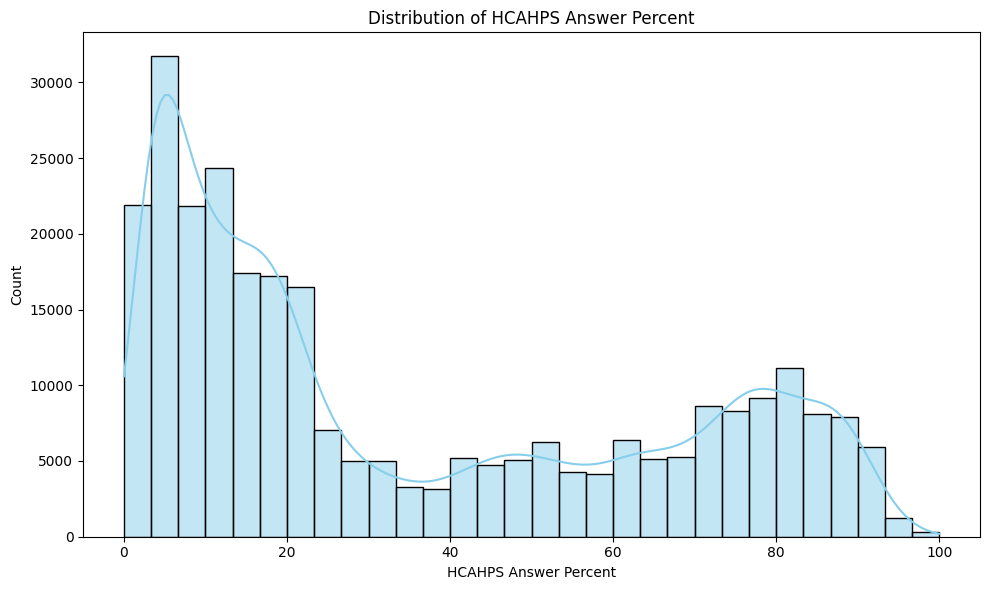

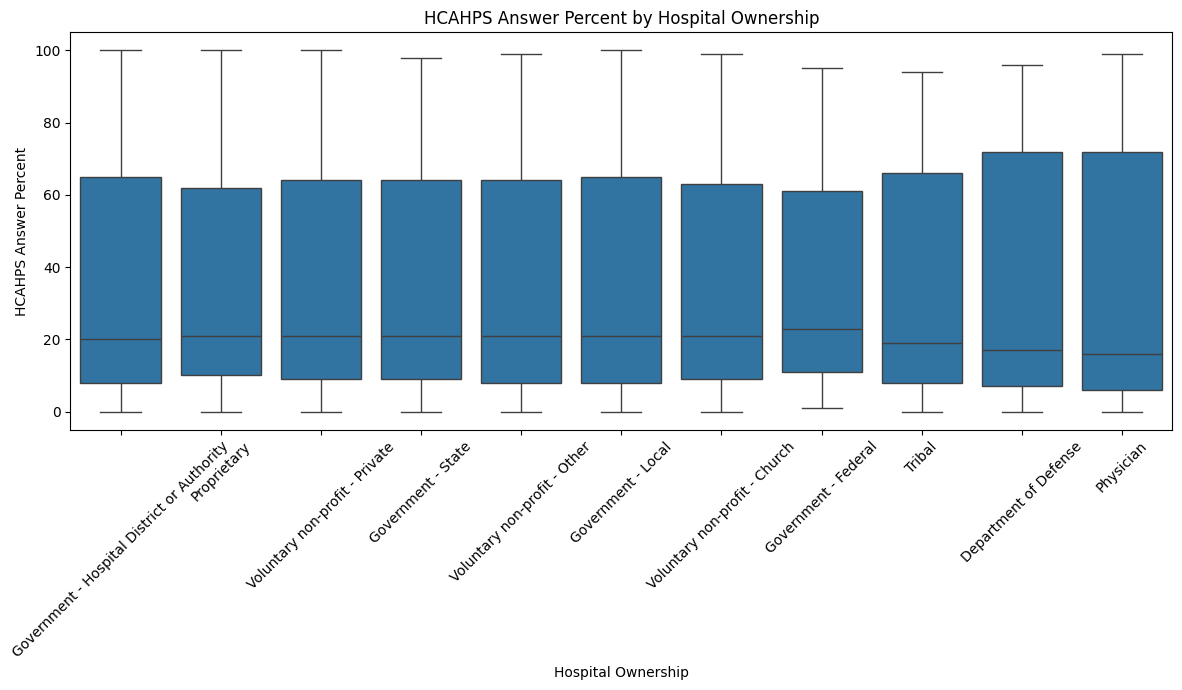

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: load your data
# df = pd.read_csv('your_data.csv')

# Convert columns to numeric (if not already)
cols_to_numeric = ['HCAHPS Answer Percent', 'HCAHPS Linear Mean Value', 
                   'Number of Completed Surveys', 'Survey Response Rate Percent']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing in critical columns for visualization
df_clean = df.dropna(subset=['HCAHPS Answer Percent', 'Hospital Ownership'])

# Histogram of HCAHPS Answer Percent
plt.figure(figsize=(10,6))
sns.histplot(df_clean['HCAHPS Answer Percent'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of HCAHPS Answer Percent')
plt.xlabel('HCAHPS Answer Percent')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('histogram_hcahps_answer_percent.png')  # optional save
plt.show()

# Boxplot of HCAHPS Answer Percent by Hospital Ownership
plt.figure(figsize=(12,7))
sns.boxplot(data=df_clean, x='Hospital Ownership', y='HCAHPS Answer Percent')
plt.title('HCAHPS Answer Percent by Hospital Ownership')
plt.xlabel('Hospital Ownership')
plt.ylabel('HCAHPS Answer Percent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplot_hcahps_by_ownership.png')  # optional save
plt.show()
